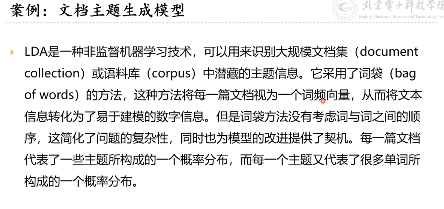

In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim import corpora, models


In [2]:
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            data.append(line[:-1])
    return data

In [4]:
def process(input_text):
    tokenizer = RegexpTokenizer(r'\w+')
    stemmer = SnowballStemmer('english')
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer.tokenize(input_text.lower())
    tokens = [x for x in tokens if not x in stop_words]
    tokens_stemmed = [stemmer.stem(x) for x in tokens]
    return tokens_stemmed


In [7]:
file = 'data/lda.txt'
data = load_data(file)

tokens = [process(doc) for doc in data]

dict_tokens = corpora.Dictionary(tokens)

doc_term_mat = [dict_tokens.doc2bow(doc) for doc in tokens]

mum_topics = 2

ldamodel = models.ldamodel.LdaModel(doc_term_mat, num_topics=mum_topics, id2word=dict_tokens, passes=25)

num_words = 5
print('\nTop ' + str(num_words) +'contributing words to each topic:')
for item in ldamodel.print_topics(num_words=num_words,num_topics=mum_topics):
    print('\nTopic ', item[0])

    list_of_strings = item[1].split(' + ')
    for string in list_of_strings:
        weight = string.split('*')[0]
        word = string.split('*')[1]
        print(word,'--->',str(round(float(weight)*100,2))+'%')

C:\Users\limenghua\AppData\Local\Temp\ipykernel_2104\3655902289.py:4: RuntimeWarning: assigning None to unbound local 'doc'
  tokens = [process(doc) for doc in data]
C:\Users\limenghua\AppData\Local\Temp\ipykernel_2104\3655902289.py:4: RuntimeWarning: assigning None to unbound local 'doc'
  tokens = [process(doc) for doc in data]



Top 5contributing words to each topic:

Topic  0
"countri" ---> 3.8%
"tariff" ---> 3.8%
"us" ---> 3.2%
"good" ---> 3.2%
"china" ---> 2.6%

Topic  1
"reach" ---> 1.9%
"report" ---> 1.9%
"us" ---> 1.9%
"key" ---> 1.9%
"kingdom" ---> 1.9%
